In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
import seaborn as sns
from style import output_folder, big_fontsize, base_width, base_height, dpi
import nuztf
from nuztf.ampel_api import ampel_api_name

In [5]:
# plt.rcParams["font.family"] = "sans-serif"
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{romanbar}')

In [6]:
redshift = 1. + 0.55708

In [7]:
res = ampel_api_name('ZTF17aacmssc')[0]

In [ ]:
#from avro

refmag = {
    "g": 17.7810001373291,
    "r": 17.33500099182129,
    "i": 16.777000427246094
}

In [ ]:
# fp = pd.read_csv("data/ZTF17aacmssc_SNT_5.0.csv", sep=",", index_col=0)
# print(fp.columns)

# print(fp["mag"])

In [ ]:
# photometry = pd.read_csv("data/ZTF17aacmssc.csv", sep=",")
# print(photometry)
# photometry = fp
# det_mask = photometry["mag"] != 99.
# obs = photometry[det_mask]
# lim = photometry[~det_mask]

19.8460006713867 20.3785495758057
19.8460006713867 20.5821990966797
19.8460006713867 20.8283996582031
19.3689994812012 20.4743995666504
19.8460006713867 20.3530006408691
19.8460006713867 20.6737003326416
19.3689994812012 20.4969997406006
19.8460006713867 20.1890621185303
19.3689994812012 19.9425716400146
19.8460006713867 20.2766990661621
19.3689994812012 20.1118698120117
19.8460006713867 20.2391872406006
19.3689994812012 20.0612602233887
19.8460006713867 20.1950359344482
19.3689994812012 20.1382789611816
19.3689994812012 20.1400375366211
19.8460006713867 20.3656234741211
19.8460006713867 20.2366428375244
19.8460006713867 20.2846412658691
19.3689994812012 20.2286186218262
19.3689994812012 19.9809741973877
19.8460006713867 20.512300491333
19.8460006713867 20.4161567687988
19.8460006713867 20.2747535705566
19.8460006713867 20.4013156890869
19.3689994812012 20.2516136169434
19.8460006713867 20.3416309356689
19.3689994812012 20.1449108123779
19.8460006713867 20.3784999847412
19.368999481201

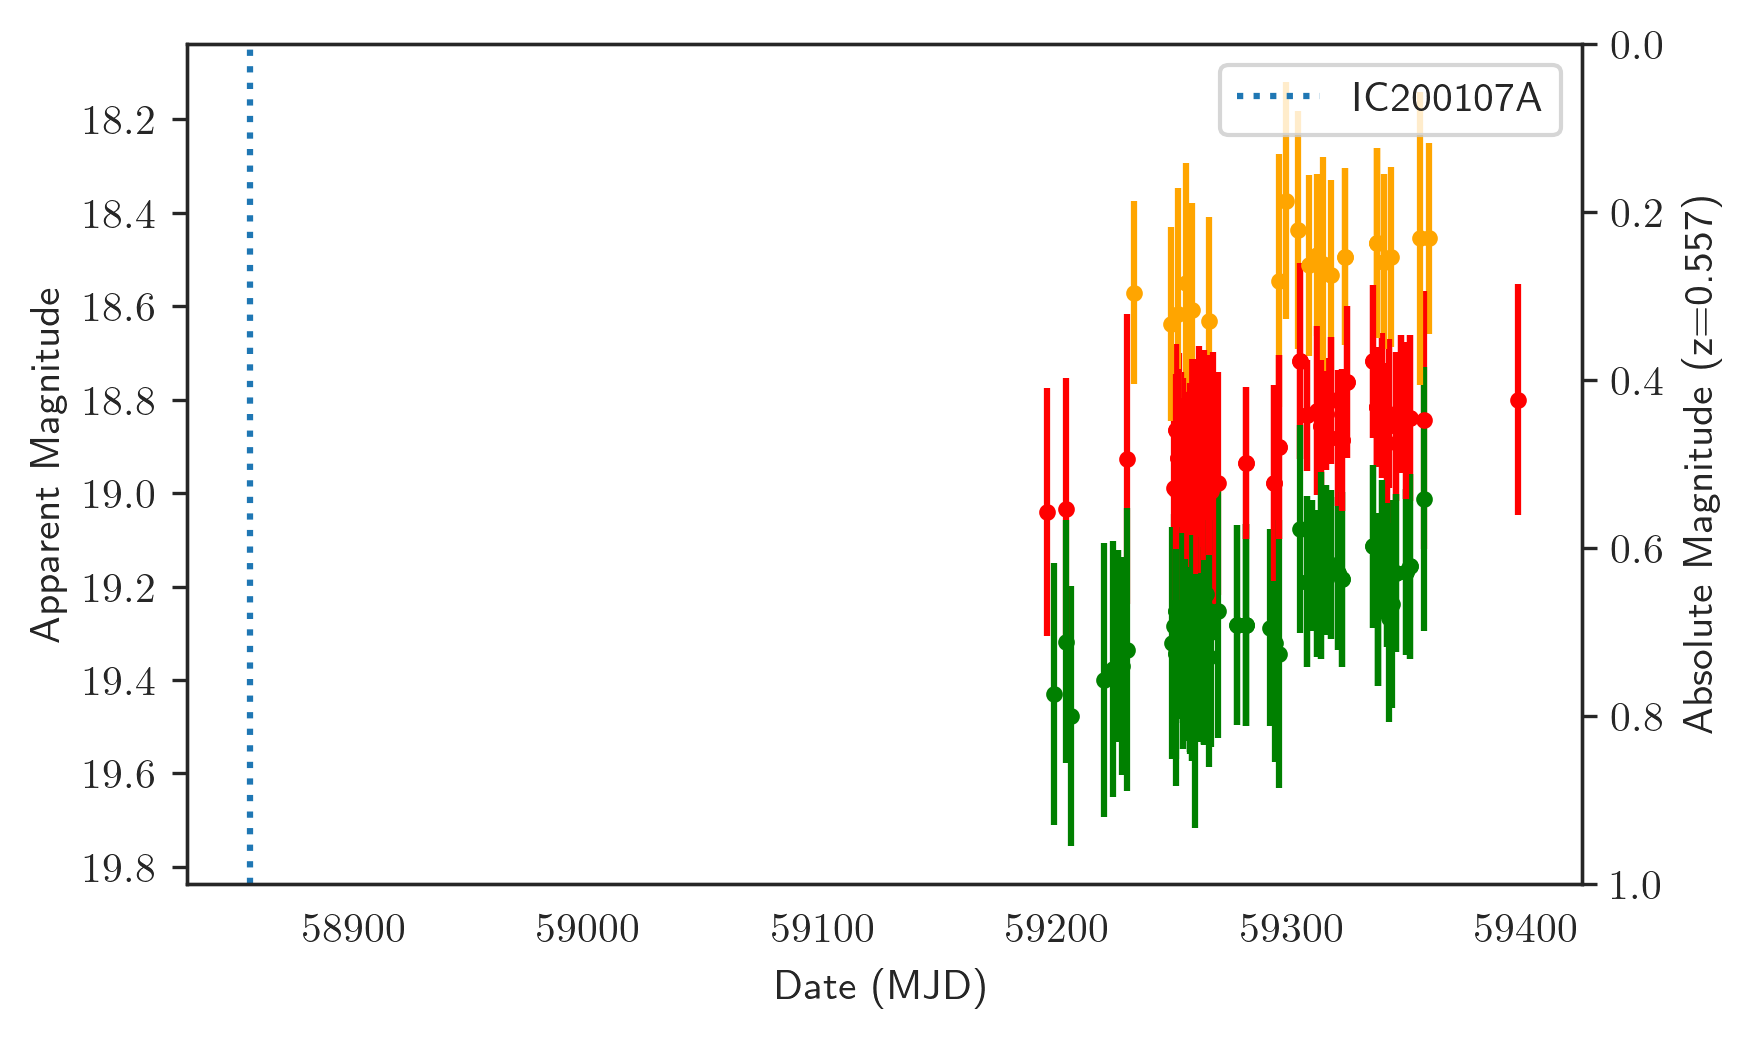

In [15]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)

ax = plt.subplot(111)
ax1b = ax.twinx()

cmap2 = {
    1: "g",
    2: "r",
    3: "orange"
}

wl = {
    1: 472.27,
    2: 633.96,
    3: 788.61,
}

markersize=3.

for alert in res["prv_candidates"]:
    
    c = cmap[alert["fid"]]
    
    if "magpsf" in alert.keys():
                
        factor = bool(alert["isdiffpos"])*2 - 1.

        mag = -2.5 * np.log10(10**(-0.4*alert["magnr"]) + factor * 10.**(-0.4*alert["magpsf"]))

        mask = factor > 0.
        
        ax.errorbar(alert["jd"]-2400000.5, mag, yerr=alert["sigmapsf"], color=c, marker="o", linestyle=" ", markersize=markersize)

#         delta = np.mean(df["magpsf"] - df["absmag"])

#         ax1b.errorbar(df["jdobs"]-2400000.5, mag - delta, color=cmap[f[-1]], yerr=df["sigmamagpsf"], marker="o", linestyle=" ", markersize=markersize)
#         ax.axhline(refmag[f[-1]], color=cmap[f[-1]], linestyle="--")
        
#     mask = obs["filter"] == f
    
#     if np.sum(mask) > 0:
    
#         df = obs[mask]
    
#         factor = (df["isdiffpos"])*2 - 1.

#         mag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + factor * 10.**(-0.4*df["magpsf"]))

#         mask = factor > 0.

#         ax.errorbar(df["jdobs"]-2400000.5, mag, yerr=df["sigmamagpsf"], color=cmap[f[-1]], marker="o", linestyle=" ", label=f'{f[-1]} ({wl[f]:.0f} nm)', markersize=markersize)

#         delta = np.mean(df["magpsf"] - df["absmag"])

#         ax1b.errorbar(df["jdobs"]-2400000.5, mag - delta, color=cmap[f[-1]], yerr=df["sigmamagpsf"], marker="o", linestyle=" ", markersize=markersize)
#         ax.axhline(refmag[f[-1]], color=cmap[f[-1]], linestyle="--")
    
#     ldf = lim[lim["filter"] == f]    
#     limmag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + 10.**(-0.4*ldf["limmag"]))
#     ax.errorbar(ldf["jdobs"]-2400000.5, limmag, color=cmap[f[-1]], linestyle=" ", uplims=True)
#     ax1b.errorbar(ldf["jdobs"]-2400000.5, limmag - delta, color=cmap[f[-1]], linestyle=" ", uplims=True, marker="v")
    
ax.invert_yaxis()
ax1b.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2020-01-07T09:42:18.36", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC200107A")

ax.legend(fontsize=big_fontsize)

filename = "bzb_lightcurve.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")
plt.ylim()

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)


# plt.yscale("log")

In [ ]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)

ax = plt.subplot(111)
ax1b = ax.twinx()

cmap = {
    "g": "g",
    "r": "r",
    "i": "orange"
}

wl = {
    "g": 472.27,
    "r": 633.96,
    "i": 788.61,
}

markersize=3.

for f in ["g", "r", "i"]:
    
    mask = obs["filter"] == f
    
    if np.sum(mask) > 0:
    
        df = obs[mask]
    
        factor = (df["isdiffpos"])*2 - 1.

        mag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + factor * 10.**(-0.4*df["magpsf"]))

        mask = factor > 0.

        ax.errorbar(df["jdobs"]-2400000.5, mag, yerr=df["sigmamagpsf"], color=cmap[f[-1]], marker="o", linestyle=" ", label=f'{f[-1]} ({wl[f]:.0f} nm)', markersize=markersize)

        delta = np.mean(df["magpsf"] - df["absmag"])

        ax1b.errorbar(df["jdobs"]-2400000.5, mag - delta, color=cmap[f[-1]], yerr=df["sigmamagpsf"], marker="o", linestyle=" ", markersize=markersize)
        ax.axhline(refmag[f[-1]], color=cmap[f[-1]], linestyle="--")
    
#     ldf = lim[lim["filter"] == f]    
#     limmag = -2.5 * np.log10(10**(-0.4*refmag[f[-1]]) + 10.**(-0.4*ldf["limmag"]))
#     ax.errorbar(ldf["jdobs"]-2400000.5, limmag, color=cmap[f[-1]], linestyle=" ", uplims=True)
#     ax1b.errorbar(ldf["jdobs"]-2400000.5, limmag - delta, color=cmap[f[-1]], linestyle=" ", uplims=True, marker="v")
    
ax.invert_yaxis()
ax1b.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax1b.set_ylabel(rf"Absolute Magnitude (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2019-07-30T20:50:41.31", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC190730A")

ax.legend(fontsize=big_fontsize)

filename = "bzb_lightcurve.pdf"

output_path = os.path.join(output_folder, f"ztf_too/{filename}")
plt.ylim()

output_path = os.path.join(output_folder, filename)
plt.savefig(f"plots/{filename}")
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)


# plt.yscale("log")

In [37]:
from astropy.io import fits
data = fits.open("data/bzb.fits")

In [51]:
print(data[1].data.dtype.names)
print(data[1].data["field"])

('null_bitfield_flags', 'oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode', 'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid', 'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime', 'airmass', 'programid')
[ 667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  667  667  667  667  667  667  667  667
  667  667  667  667  667  667  

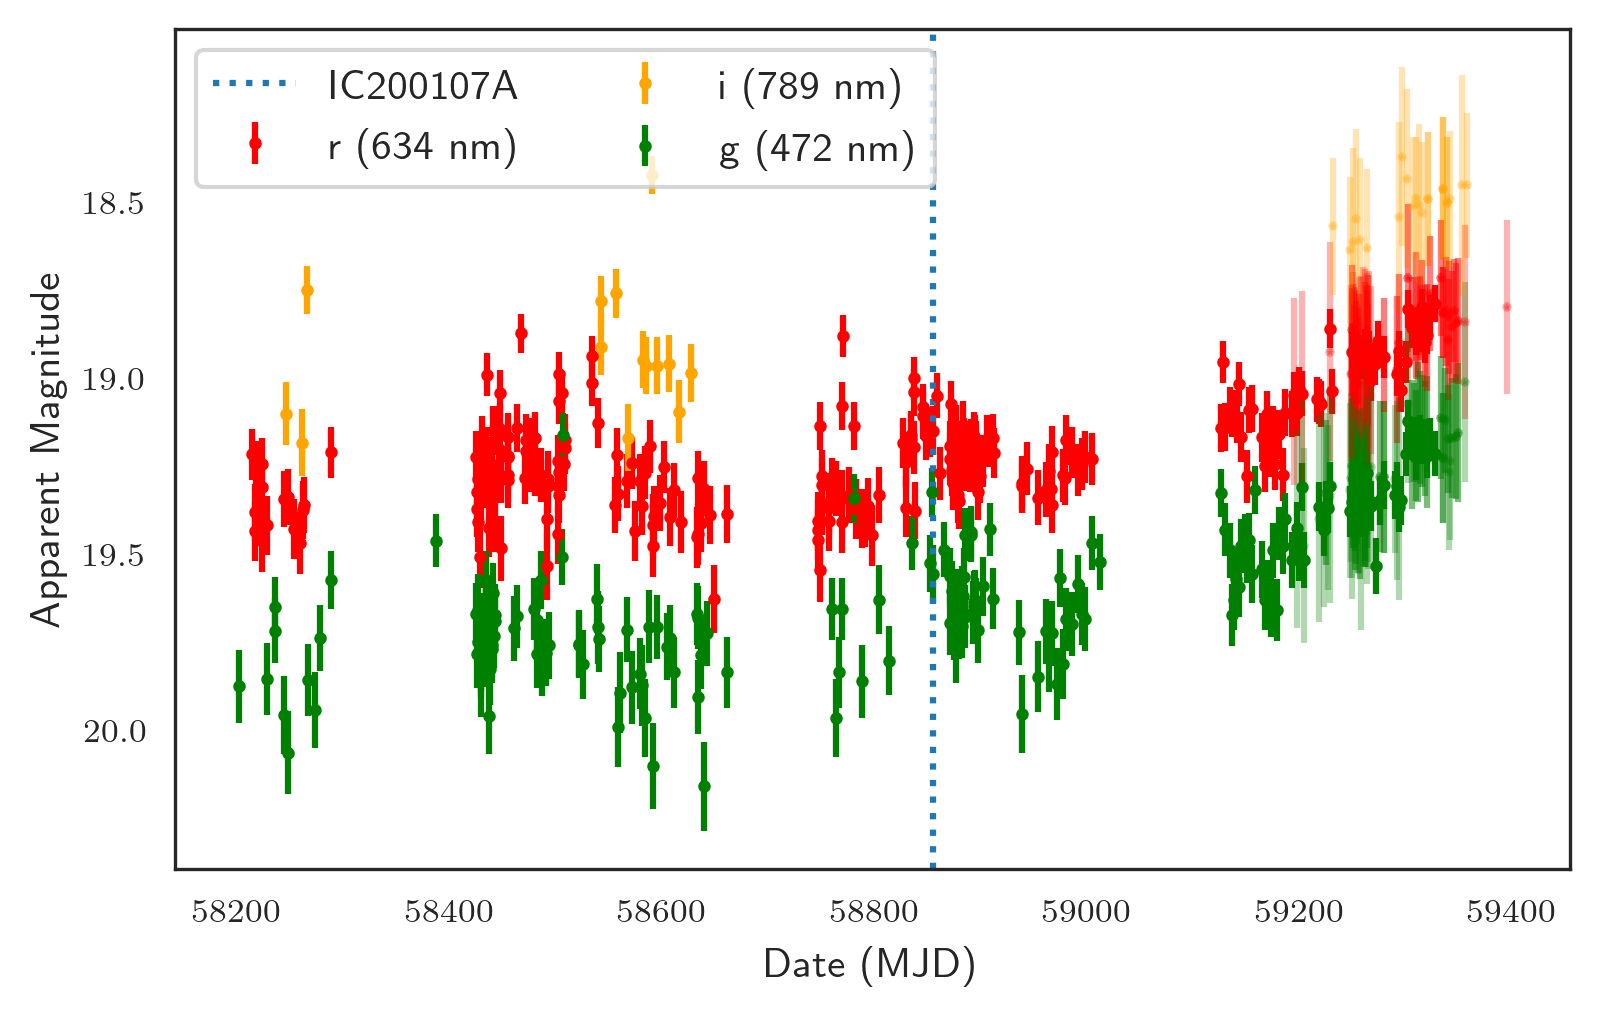

In [50]:
plt.figure(figsize=(base_width, base_height), dpi=dpi)

ax = plt.subplot(111)

cmap = {
    "zg": "g",
    "zr": "r",
    "zi": "orange"
}

cmap2 = {
    1: "g",
    2: "r",
    3: "orange"
}

wl = {
    "zg": 472.27,
    "zr": 633.96,
    "zi": 788.61,
}

markersize=2.


for fc in list(set(data[1].data["filtercode"])):
    mask = data[1].data["filtercode"] == fc
    
    ax.errorbar(
        data[1].data["mjd"][mask], 
        data[1].data["mag"][mask],
        yerr=data[1].data["magerr"][mask],
        marker="o",
        linestyle=" ",
        markersize=markersize,
        c=cmap[fc],
        label=f'{fc[-1]} ({wl[fc]:.0f} nm)',
    )
    
for alert in res["prv_candidates"]:
    
    c = cmap2[alert["fid"]]
    
    if "magpsf" in alert.keys():
                
        factor = bool(alert["isdiffpos"])*2 - 1.

        mag = -2.5 * np.log10(10**(-0.4*alert["magnr"]) + factor * 10.**(-0.4*alert["magpsf"]))

        mask = factor > 0.
        
        ax.errorbar(alert["jd"]-2400000.5, mag, yerr=alert["sigmapsf"], color=c, marker="*", linestyle=" ", markersize=markersize, alpha=0.3)
    
ax.invert_yaxis()
ax.set_ylabel(r"Apparent Magnitude", fontsize=big_fontsize)
ax.set_xlabel("Date (MJD)", fontsize=big_fontsize)

t_neutrino = Time("2020-01-07T09:42:18.36", format='isot', scale='utc')

ax.axvline(t_neutrino.mjd, linestyle=":", label="IC200107A")

ax.legend(fontsize=big_fontsize, ncol=2)